In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import os
import utils
import h5py
from scipy.optimize import curve_fit
from PIL import Image

import scipy.ndimage as nd

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as PathEffects

%matplotlib inline

%reload_ext autoreload
%autoreload 2

c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
root = r"C:\Users\Bruker\Documents\SIRT"
choose_formatter(False)

In [5]:
# Load .npy files

root = r"C:\Users\Bruker\Documents\SIRT"

names = [
    "hourglassV3_13_55",
    "limestoneV3_17_55_12favg",
]



crossections = { }

identifiers = [
    "gt",
    "gt",
    "Rec_0_1_sirt",
    "Rec_0_1_sirt",
    "Rec_0_1_sirt_enhanced_800512512",
    "Rec_0_1_sirt_enhanced_700428728",

]
keys = [
    "hgt",
    "sgt",
    "h26",
    "s26",
    "h26_enhanced",
    "s26_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,256
        y1, y2 = 0,256
        z1, z2 = 0,256
        root = r"C:\Users\Bruker\Documents\SIRT"
    elif "limestone" in names[j%2]:
        x1, x2 = 572, 828  # 672, 928
        y1, y2 = 300, 556  # 384, 640
        z1, z2 = 600, 856  # 384, 640
        root = r"C:\Users\Bruker\Documents\Sandstone"
    else:
        x1, x2 = 672, 928
        y1, y2 = 384, 640
        z1, z2 = 384, 640
        root = r"C:\Users\Bruker\Documents\4DCT"

    load_name = f"{names[j%2]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    crossections[key]= np.squeeze(np.load(load_path))

SSIM 0: 0.99, 0.99


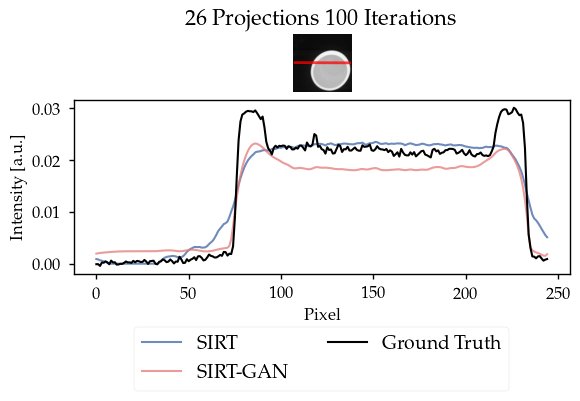

SSIM 1: 1.00, 0.99


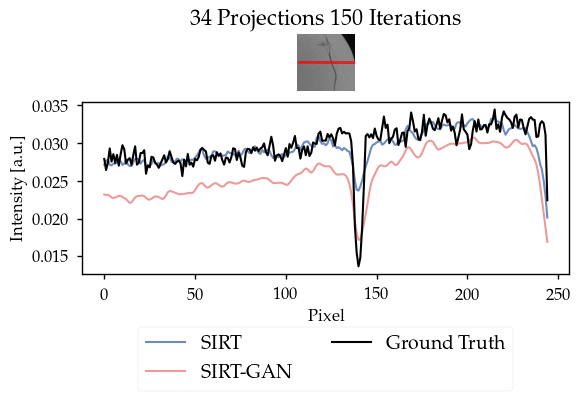

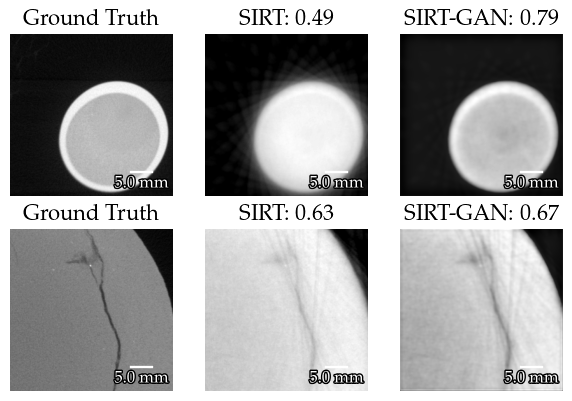

In [6]:
slice_norm = lambda x, ref : x* (np.max(ref) - np.min(ref)) + np.min(ref)

slice_indexer_x = lambda x, h: x[h]
slice_indexer_y = lambda x, h: x[:,h]
slice_indexer_z = lambda x, h: x[:,:,h]

# slice_indexer = [slice_indexer_x, ]#slice_indexer_y, slice_indexer_z]
si = slice_indexer_x
hs = [160, 128]
key = str(17) #Sandstone not re-reconstructed at this point. Satisfied with number of projections.
keys = [["hgt", "h26", "h26_enhanced"], ["sgt", "s26", "s26_enhanced"]]

all_slices = []
all_labels = []

idxs= [128, 129, 10,255]
titles = ["26 Projections 100 Iterations", "34 Projections 150 Iterations",]

for i, (kgt, kin, kout) in enumerate(keys):

    slgt = si(crossections[kgt], hs[i%2])
    slit = si(crossections[kin], hs[i%2])
    slout = slice_norm(si(crossections[kout], hs[i]), crossections[kin])

    all_slices.extend([slgt, slit, slout])

    k=  11

    mssit, _ = utils.calc_mssim(slgt, slit, k=k)
    mssout, _ = utils.calc_mssim(slgt, slout, k=k)    

    all_labels.extend([f"Ground Truth", f"SIRT: {mssit:.2f}", f"SIRT-GAN: {mssout:.2f}"])

    ssit = utils.calc_ssim(  slgt, slit)  
    ssout= utils.calc_ssim( slgt, slout)

    print(f"SSIM {i}: {ssit:.2f}, {ssout:.2f}")

    plot_line_profile([slit, slout], ["SIRT", "SIRT-GAN"], slgt, idxs=idxs, title=titles[i],  savefile=f"SIRT_{kgt}_lineprofile", folder="SIRT", savefig=True)

scale_kwargs = {
    "size": 5 / (0.2 * 930) * 1350,
    "label": f"5.0 mm",
    "color": "white",
    "loc": 4,
    "frameon": False,
    "size_vertical": 3,
    "label_top": False,
    # "font_properties": {"size": 16}
}
plot_slice_grid(
    all_slices,
    all_labels,
    suptitle=None,
    folder="SIRT",
    savefile="Slice_grid_SIRT_enhancement",
    savefig=False,
    bar = True,
    scalebar_kwargs=scale_kwargs,
    fs = (1,1.5),
    ns = (2,3)    
)


In [26]:
names = [
    r"C:\Users\Bruker\Documents\4DCT\hourglassV3_13_55",
    r"C:\Users\Bruker\Documents\Sandstone\limestoneV3_17_55_12favg",
]



references = { }

identifiers = [
    "gt",
    "gt",
    "Rec_0_2_fdk",
    "Rec_0_2_fdk",
    "Rec_0_2_fdk_enhanced_800512512",
    "Rec_0_2_fdk_enhanced_700428728",

]
keys = [
    "hgt",
    "sgt",
    "h26",
    "s26",
    "h26_enhanced",
    "s26_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,256
        y1, y2 = 0,256
        z1, z2 = 0,256
        root = r"C:\Users\Bruker\Documents\SIRT"
    elif "limestone" in names[j%2]:
        x1, x2 = 572, 828  # 672, 928
        y1, y2 = 300, 556  # 384, 640
        z1, z2 = 600, 856  # 384, 640
        root = r"C:\Users\Bruker\Documents\Sandstone"
    else:
        x1, x2 = 672, 928
        y1, y2 = 384, 640
        z1, z2 = 384, 640
        root = r"C:\Users\Bruker\Documents\4DCT"

    load_name = f"{names[j%2]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join("", load_name)
    references[key]= np.squeeze(np.load(load_path))

In [27]:

import utils

normalise = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))



x1,x2 = 160, 256
y1,y2 = 0, 256
z1,z2 = 0, 256

X, Y, Z = np.meshgrid(np.arange(x2-x1), np.arange(y2-y1), np.arange(z2-z1))
evsizes = (x2-x1, y2-y1, z2-z1)

radius = np.sqrt((X - evsizes[0]//2)**2 + (Y - evsizes[1]//2)**2 + (Z-evsizes[2]//2)**2).flatten()

uniques = np.unique(radius)

sandstone_evsizes = [256, 256, 256]
hourglass_evsizes = [x2-x1, y2-y1, z2-z1] 

hourglass_gt_3D = normalise(crossections["hgt"][x1:x2, y1:y2, z1:z2])
sandstone_gt_3D = normalise(crossections["sgt"][x1:x2, y1:y2, z1:z2])

sirt_3D = {}
for k in keys[2:]:
    if k.startswith("h"):
        sirt_3D[k] = normalise(crossections[k][x1:x2, y1:y2, z1:z2])
    else:
        sirt_3D[k] = normalise(crossections[k][x1:x2, y1:y2, z1:z2])

fdk_3D = {}
for k in keys[2:]:
    if k.startswith("h"):

        fdk_3D[k] = normalise(references[k][x1:x2, y1:y2, z1:z2])
    else:

        fdk_3D[k] = normalise(references[k][x1:x2, y1:y2, z1:z2])

sirt_outs = []
fdk_outs = []
for k in keys[2:]:

    if k.startswith("h"):
        sirt_outs.append( 
            utils.FSC(hourglass_gt_3D, sirt_3D[k], sizes=hourglass_evsizes)
        )
        fdk_outs.append(
            utils.FSC(hourglass_gt_3D, fdk_3D[k], sizes=hourglass_evsizes)
    )
    else:
        sirt_outs.append( 
            utils.FSC(sandstone_gt_3D, sirt_3D[k], sizes=hourglass_evsizes)
        )
        fdk_outs.append(
            utils.FSC(sandstone_gt_3D, fdk_3D[k], sizes=hourglass_evsizes)
    )
    


(26529,)


100%|██████████| 26529/26529 [00:02<00:00, 13185.75it/s]


(26529,)


100%|██████████| 26529/26529 [00:01<00:00, 13330.14it/s]


(26529,)


100%|██████████| 26529/26529 [00:02<00:00, 11034.69it/s]


(26529,)


100%|██████████| 26529/26529 [00:02<00:00, 10606.36it/s]


(26529,)


100%|██████████| 26529/26529 [00:02<00:00, 9542.60it/s] 


(26529,)


100%|██████████| 26529/26529 [00:02<00:00, 9968.11it/s] 


(26529,)


100%|██████████| 26529/26529 [00:02<00:00, 10652.54it/s]


(26529,)


100%|██████████| 26529/26529 [00:02<00:00, 11418.82it/s]


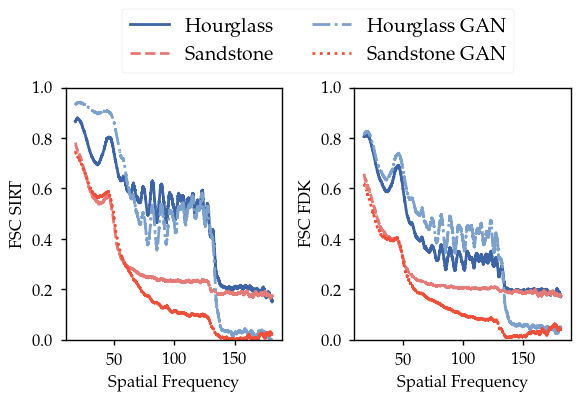

In [28]:

plot_fsc(
    sirt_outs,
    fdk_outs,
    uniques,
    fq_keys = ["Hourglass", "Sandstone", "Hourglass GAN", "Sandstone GAN"],
    filter=265,
    savefile = "FSC_SIRT",
    folder = "SIRT",
    save = True,
    ylabel1 = "FSC SIRT",
    ylabel2 = "FSC FDK",
    ncols=2,  


)